# Carrifran Rewilding Area



Carrifran has an area of 3,100 hectares has been rewilding since 2000 [1, 2].
The first trees were planted on Millennium Day and the Carrifran Wildwood now boasts around 750,000 trees [3].

[1] <https://www.rewildingbritain.org.uk/rewilding-projects/reviving-the-wild-heart-of-southern-scotland>

[2] <https://www.bbc.co.uk/newsround/62344491>

[3] <https://www.bordersforesttrust.org/about-us/vision>

![Carrifran Boundary](https://images.ctfassets.net/p3r8buzp5omt/6YcMwwBKEeBX5QACsGd7vN/c0a3940577c3ba368632e0d829887378/Carrifran_2021_Boundary.jpg)


In [30]:
! pip install sithom

In [1]:
from sithom.place import Point
carrifran_wildwoods = Point(-3.3280582890583266, 55.39046283461186)

In [2]:
carrifran_wildwoods.bbox(buffer=0.5).cartopy()

[-3.8280582890583266,
 -2.8280582890583266,
 54.89046283461186,
 55.89046283461186]

## Boundary from OS Map

In [3]:
data = """315429.5612009238, 610520.5072277822
315309.4688221709, 610732.9142075101
315133.94919168594, 611093.2127277394
315198.61431870674, 611380.5491403644
315254.0415704388, 611621.5464887521
315272.5173210162, 611853.1135061159
315161.662817552, 612037.7854760073
315032.3325635104, 612222.3719100163
314856.8129330254, 612360.4482080233
314635.103926097, 612377.9402959542
314450.34642032336, 612377.0849371311
314311.77829099307, 612561.6286031991
314173.21016166284, 612810.9870840819
314043.87990762125, 613097.4253699428
313997.69053117785, 613282.3967154222
314006.9284064665, 613421.3283722522
314053.11778290995, 613514.1348045506
314034.6420323326, 613652.9381575572
314016.1662817552, 613791.7415105638
314016.1662817552, 613912.1118809341
314043.87990762125, 614032.610555128
314090.0692840647, 614125.4169874262
314127.0207852194, 614153.3658369686
314219.3995381062, 614227.8675904543
314321.01616628177, 614348.7084081772
314390.3002309469, 614436.9921306989
314454.96535796765, 614543.7729877684
314524.2494226328, 614710.7604139937
314588.9145496536, 614766.6153451373
314579.6766743649, 614868.4244290481
314616.62817551964, 615016.7436489608
314745.95842956123, 615221.0461038406
315346.42032332567, 615390.4926866821
315364.896073903, 615464.6522966385
316348.7297921478, 615186.7996749637
316316.3972286374, 615070.909246429
316039.2609699769, 614727.0336156018
315775.9815242494, 614248.9628774271
315942.26327944576, 613856.2141818494
315891.45496535796, 613578.2011803952
315872.9792147806, 613689.226755624
315928.4064665127, 613458.0018817894
315988.45265588915, 613384.2057993328
316076.21247113164, 613208.6861688478
316113.1639722864, 613042.1905739459
316150.11547344114, 612884.954238303
316214.7806004619, 612737.105465743
316242.494226328, 612653.900436233
316205.54272517323, 612477.8034385425
316187.06697459583, 612338.8290137714
316177.8290993072, 612236.9343939783
316177.8290993072, 612144.3418013857
316177.8290993072, 612042.4899495338
316168.5912240185, 611922.0768112224
316163.97228637413, 611810.9443161407
316131.63972286374, 611699.6835172356
316048.4988452656, 611634.4837909504
315956.12009237875, 611559.9820374647
315882.2170900693, 611485.5658198615
315882.2170900693, 611346.6769309726
315817.5519630485, 611188.9701479771
315734.4110854504, 611049.6963476179
315678.98383371823, 610915.1804807117
315586.60508083145, 610748.0861346335
315429.5612009238, 610520.5072277822"""

old = (315928.4064665127, 615319.1129929005)


In [4]:
import numpy as np
data_np = np.array([[float(y) for y in x.split(",")] for x in data.split("\n")])

In [5]:
data_np.shape

(65, 2)

Text(0.5, 1.0, 'Carrifran Rewilding Box')

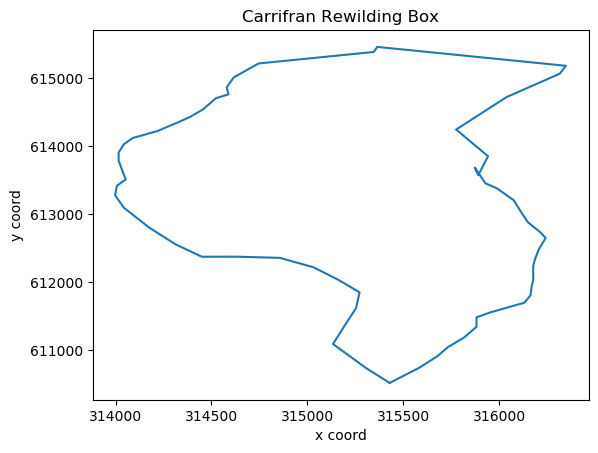

In [6]:
import matplotlib.pyplot as plt
plt.plot(data_np[:, 0], data_np[:, 1])
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.title("Carrifran Rewilding Box")

In [7]:
!pip install OSGridConverter

In [28]:
from typing import List
from OSGridConverter import grid2latlong, latlong2grid


def lonlat_to_os(lonlat_array: np.ndarray) -> np.ndarray:
    """WGS84 Lon Lat to OS grid"""
    output = []
    shape = lonlat_array.shape
    for i in range(shape[0]):
        l = latlong2grid(lonlat_array[i, 1], lonlat_array[i, 0])
        output.append([l.E, l.N])
        assert "NT" in str(l)
    return np.array(output)


def os_to_lonlat(os_array: np.ndarray, os_sheet="NT") -> np.ndarray:
    """Ordinace Survey to WGS84 Lon Lat.
    
    Args:
        os_array (np.ndarray): Ordinance survey points. np.array([[x_point0, y_point0] ...]).
        os_sheet (str, optional): Ordinance survey sheet. Defaults to "NT".
    """
    output = []
    shape = os_array.shape
    for i in range(shape[0]):
        l = grid2latlong(
            os_sheet + " " + str(int(os_array[i, 0])) + " " + str(int(os_array[i, 1]))
        )
        output.append([l.longitude, l.latitude])
    return np.array(output)

In [32]:
lonlat_np = os_to_lonlat(data_np)
test_np = lonlat_to_os(lonlat_np)
np.all(test_np == data_np) # Testing circularity

False

In [33]:
data_np

array([[315429.56120092, 610520.50722778],
       [315309.46882217, 610732.91420751],
       [315133.94919169, 611093.21272774],
       [315198.61431871, 611380.54914036],
       [315254.04157044, 611621.54648875],
       [315272.51732102, 611853.11350612],
       [315161.66281755, 612037.78547601],
       [315032.33256351, 612222.37191002],
       [314856.81293303, 612360.44820802],
       [314635.1039261 , 612377.94029595],
       [314450.34642032, 612377.08493713],
       [314311.77829099, 612561.6286032 ],
       [314173.21016166, 612810.98708408],
       [314043.87990762, 613097.42536994],
       [313997.69053118, 613282.39671542],
       [314006.92840647, 613421.32837225],
       [314053.11778291, 613514.13480455],
       [314034.64203233, 613652.93815756],
       [314016.16628176, 613791.74151056],
       [314016.16628176, 613912.11188093],
       [314043.87990762, 614032.61055513],
       [314090.06928406, 614125.41698743],
       [314127.02078522, 614153.36583697],
       [314

In [34]:
test_np

array([[331535, 661052],
       [331523, 661073],
       [331506, 661109],
       [331512, 661138],
       [331518, 661162],
       [331520, 661185],
       [331509, 661203],
       [331496, 661222],
       [331478, 661236],
       [331456, 661237],
       [331438, 661237],
       [331424, 661256],
       [331410, 661281],
       [331397, 661309],
       [331392, 661328],
       [331393, 661342],
       [331398, 661351],
       [331396, 661365],
       [331394, 661379],
       [331394, 661391],
       [331397, 661403],
       [331402, 661412],
       [331405, 661415],
       [331414, 661422],
       [331425, 661434],
       [331432, 661443],
       [331438, 661454],
       [331445, 661471],
       [331451, 661476],
       [331450, 661486],
       [331454, 661501],
       [331467, 661522],
       [331527, 661539],
       [331529, 661546],
       [331627, 661518],
       [331624, 661507],
       [331596, 661472],
       [331570, 661424],
       [331587, 661385],
       [331582, 661357],


In [19]:
lonlat_np = os_to_lonlat(data_np)

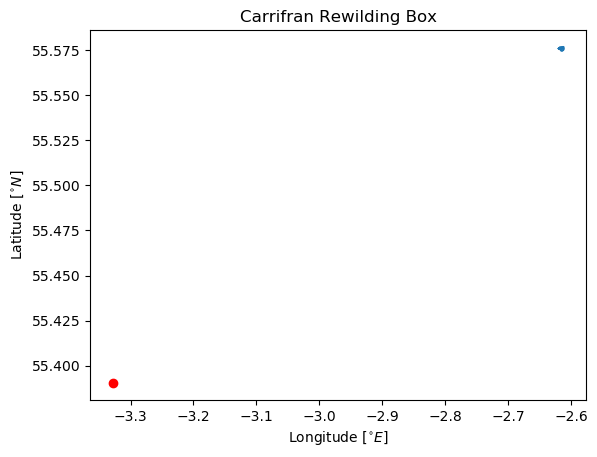

In [20]:
import matplotlib.pyplot as plt
plt.plot(lonlat_np[:, 0], lonlat_np[:, 1])
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.title("Carrifran Rewilding Box")
plt.scatter(carrifran_wildwoods.lon, carrifran_wildwoods.lat, color="red")

In [ ]:
bbox = carrifran_wildwoods.bbox(buffer=0.5)

In [ ]:
bbox.cartopy()

[-3.8280582890583266,
 -2.8280582890583266,
 54.89046283461186,
 55.89046283461186]

In [ ]:
lonlat_np

array([[-3.09474752, 55.83781659],
       [-3.09494445, 55.83800353],
       [-3.09522501, 55.83832452],
       [-3.09513653, 55.83858588],
       [-3.09504678, 55.83880233],
       [-3.09502065, 55.83900923],
       [-3.09520085, 55.83916937],
       [-3.09541325, 55.8393382 ],
       [-3.09570423, 55.83946141],
       [-3.09605581, 55.83946727],
       [-3.09634325, 55.83946471],
       [-3.09657163, 55.8396334 ],
       [-3.09680152, 55.83985598],
       [-3.09701621, 55.84010567],
       [-3.09710086, 55.84027564],
       [-3.09708844, 55.84040154],
       [-3.09701087, 55.8404831 ],
       [-3.09704635, 55.84060859],
       [-3.09708183, 55.84073407],
       [-3.09708487, 55.84084187],
       [-3.09704   , 55.84095009],
       [-3.09696243, 55.84103165],
       [-3.09691528, 55.84105903],
       [-3.09677332, 55.84112319],
       [-3.09660069, 55.84123256],
       [-3.09649118, 55.8413144 ],
       [-3.09639814, 55.84141407],
       [-3.09629065, 55.84156779],
       [-3.0961961 ,

In [ ]:
np.average(lonlat_np, axis=0)

array([-3.09506814, 55.84000703])